In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# Load the data
data0 = pd.read_csv('exp_results/user_info_1.csv')
result0 = pd.read_csv('exp_results/user_results_1.csv')
data1 = pd.read_csv('exp_results/user_info_2.csv')
result1 = pd.read_csv('exp_results/user_results_2.csv')
data2 = pd.read_csv('exp_results/user_info_3.csv')
result2 = pd.read_csv('exp_results/user_results_3.csv')
data3 = pd.read_csv('exp_results/user_info_4.csv')
result3 = pd.read_csv('exp_results/user_results_4.csv')
data4 = pd.read_csv('exp_results/user_info_5.csv')
result4 = pd.read_csv('exp_results/user_results_5.csv')
data5 = pd.read_csv('exp_results/user_info_6.csv')
result5 = pd.read_csv('exp_results/user_results_6.csv')
data6 = pd.read_csv('exp_results/user_info_7.csv')
result6 = pd.read_csv('exp_results/user_results_7.csv')
data7 = pd.read_csv('exp_results/user_info_8.csv')
result7 = pd.read_csv('exp_results/user_results_8.csv')
data8 = pd.read_csv('exp_results/user_info_9.csv')
result8 = pd.read_csv('exp_results/user_results_9.csv')
data9 = pd.read_csv('exp_results/user_info_10.csv')
result9 = pd.read_csv('exp_results/user_results_10.csv')

In [32]:
data0

,Parameter,Value
0,Age,21
1,Native Language,Russian
2,Education,Bachelor's
3,Programming Experience,5
4,Country,Azerbaijan
5,Input Method,Touchpad


In [33]:
data_files = [f'exp_results/user_info_{i}.csv' for i in range(1, 10)]
result_files = [f'exp_results/user_results_{i}.csv' for i in range(1, 10)]


data_frames = [pd.read_csv(file) for file in data_files]
result_frames = [pd.read_csv(file) for file in result_files]


all_data = pd.concat(data_frames, ignore_index=True)
all_results = pd.concat(result_frames, ignore_index=True)

all_data

,Parameter,Value
0,Age,21
1,Native Language,Russian
2,Education,Bachelor's
3,Programming Experience,5
4,Country,Azerbaijan
5,Input Method,Touchpad
6,Age,26
7,Native Language,Italian
8,Education,Master's
9,Programming Experience,8


In [34]:
result0

,Task Index,Selected Identifier,Is Correct,Time Taken (ms)
0,0,rightLeft,True,2529
1,1,linked-list,True,3282
2,2,bubbleSortAlgorithm,True,3633
3,3,hash-table,True,2384
4,4,treeTraversal,True,3533
5,5,priority-queue,True,8550
6,6,binarySearch,True,1983
7,7,merge-sort,True,3133
8,8,quickSort,True,2032
9,9,bubble-sort-algorithm,True,5000


In [35]:
data0


,Parameter,Value
0,Age,21
1,Native Language,Russian
2,Education,Bachelor's
3,Programming Experience,5
4,Country,Azerbaijan
5,Input Method,Touchpad


In [38]:
results = [result0, result1, result2, result3, result4, result5, result6, result7, result8, result9]


reshaped_results = []
for result in results:
    
    participants_count = len(result) // 6
    result['Participant'] = result.index // 6

    reshaped = result.pivot(index='Participant', columns='Parameter', values='Value')
    reshaped.reset_index(inplace=True)

    for col in ['Age', 'Programming Experience']:
        if col in reshaped:
            reshaped[col] = pd.to_numeric(reshaped[col], errors='coerce')

    reshaped_results.append(reshaped)


all_results_reshaped = pd.concat(reshaped_results, ignore_index=True)
all_results_reshaped.drop(columns='Participant', inplace=True)
all_results_reshaped


KeyError: 'Parameter'

In [27]:
data_tables = [data0, data1, data2, data3, data4, data5, data6, data7, data8, data9]

merged_tables = []

for i in range(len(data_tables)):
    data_tables[i]['Participant'] = data_tables[i]['Task Index'] // 20

    merged = data_tables[i].merge(reshaped_results[i], on='Participant')

    merged_tables.append(merged)

all_merged_data = pd.concat(merged_tables, ignore_index=True)


all_merged_data.drop(columns='Participant', inplace=True)
all_merged_data


KeyError: 'Task Index'

In [68]:
camelCase_data = all_merged_data[all_data['Task Index'] < 10]
kebabcase_data = all_merged_data[all_data['Task Index'] >= 10]


In [69]:
camelCase_data

,Task Index,Selected Identifier,Is Correct,Time Taken (ms),Age,Country,Education,Native Language,Programming Experience
0,0,rightLeft,True,16514,25,Belarus,Master's,Belarusian,3
1,1,bubbleSortAlgorithm,True,3833,25,Belarus,Master's,Belarusian,3
2,2,treeTraversal,True,2400,25,Belarus,Master's,Belarusian,3
3,3,binarySearch,True,1966,25,Belarus,Master's,Belarusian,3
4,4,mergeSort,True,1900,25,Belarus,Master's,Belarusian,3
...,...,...,...,...,...,...,...,...,...
185,5,hashTable,True,1283,21,Russia,Bachelor's,Russian,4
186,6,depthfirstsearch,False,1251,21,Russia,Bachelor's,Russian,4
187,7,quickSort,True,1016,21,Russia,Bachelor's,Russian,4
188,8,priorityQueue,True,1219,21,Russia,Bachelor's,Russian,4


In [70]:
kebabcase_data

,Task Index,Selected Identifier,Is Correct,Time Taken (ms),Age,Country,Education,Native Language,Programming Experience
10,10,right-left,True,6301,25,Belarus,Master's,Belarusian,3
11,11,bubble-sort-algorithm,True,1699,25,Belarus,Master's,Belarusian,3
12,12,tree-traversal,True,1450,25,Belarus,Master's,Belarusian,3
13,13,binary-search,True,1250,25,Belarus,Master's,Belarusian,3
14,14,merge-sort,True,1150,25,Belarus,Master's,Belarusian,3
...,...,...,...,...,...,...,...,...,...
195,15,hash-table,True,1133,21,Russia,Bachelor's,Russian,4
196,16,depth-first-search,True,1599,21,Russia,Bachelor's,Russian,4
197,17,quick-sort,True,801,21,Russia,Bachelor's,Russian,4
198,18,priority-queue,True,1466,21,Russia,Bachelor's,Russian,4


In [71]:
camelCase_summary = camelCase_data['Time Taken (ms)'].agg(
    Minimum='min',
    Q1=lambda x: x.quantile(0.25),
    Median='median',
    Q3=lambda x: x.quantile(0.75),
    Maximum='max',
    Mean='mean',
    Std_Dev='std'
).reset_index(name='camelCase_data')

kebabcase_summary = kebabcase_data['Time Taken (ms)'].agg(
    Minimum='min',
    Q1=lambda x: x.quantile(0.25),
    Median='median',
    Q3=lambda x: x.quantile(0.75),
    Maximum='max',
    Mean='mean',
    Std_Dev='std'
).reset_index(name='kebabcase_data')

print("Camel Case Data Summary:")
print(camelCase_summary)

print("\nKebab Case Data Summary:")
print(kebabcase_summary)


Camel Case Data Summary:
     index  camelCase_data
0  Minimum      968.000000
1       Q1     1562.000000
2   Median     2383.500000
3       Q3     3121.000000
4  Maximum    16514.000000
5     Mean     2629.550000
6  Std_Dev     1855.769597

Kebab Case Data Summary:
     index  kebabcase_data
0  Minimum      801.000000
1       Q1     1442.000000
2   Median     1842.000000
3       Q3     2399.250000
4  Maximum     6301.000000
5     Mean     2011.560000
6  Std_Dev      868.188202


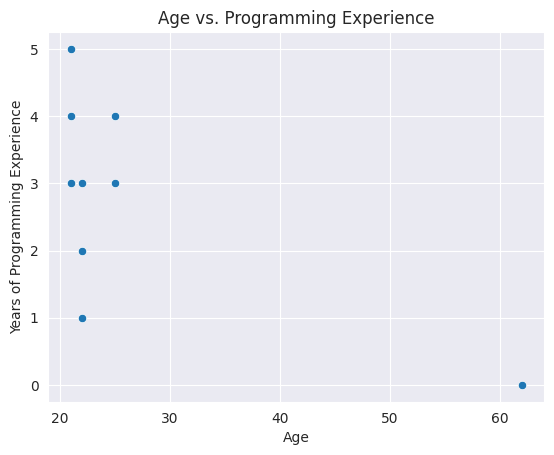

In [12]:
sns.scatterplot(x='Age', y='Programming Experience', data=all_results_reshaped)
plt.title('Age vs. Programming Experience')
plt.xlabel('Age')
plt.ylabel('Years of Programming Experience')
plt.show()


In [14]:
time_by_experience = merged.groupby('Programming Experience')['Time Taken (ms)'].mean().reset_index()

time_by_experience.columns = ['Programming Experience (Years)', 'Average Time Taken (ms)']

time_by_experience


,Programming Experience (Years),Average Time Taken (ms)
0,0,2733.0
1,1,1966.0
2,2,1900.0
3,3,6066.0
4,4,1866.5
5,5,1549.0


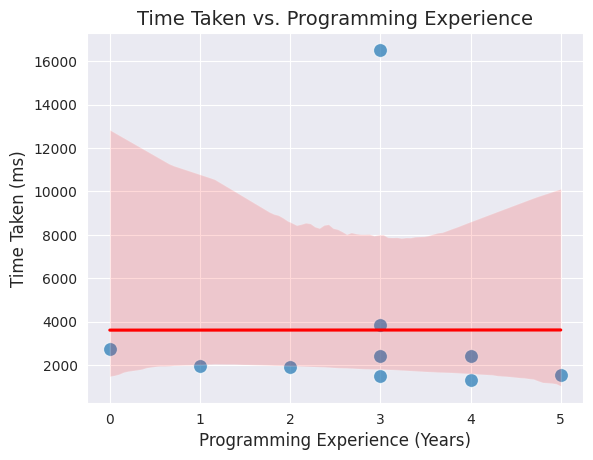

In [15]:
sns.scatterplot(x='Programming Experience', y='Time Taken (ms)', data=merged, alpha=0.7, s=100)

sns.regplot(x='Programming Experience', y='Time Taken (ms)', data=merged, scatter=False, color='red')   

plt.title('Time Taken vs. Programming Experience', fontsize=14)
plt.xlabel('Programming Experience (Years)', fontsize=12)
plt.ylabel('Time Taken (ms)', fontsize=12)

plt.show()


In [22]:
camelCase_data = all_data[all_data['Task Index'] < 10]
kebabcase_data = all_data[all_data['Task Index'] >= 10]

def calculate_summary(data):
    summary = {}
    for condition in [True, False]:
        filtered_data = data[data['Is Correct'] == condition]['Time Taken (ms)']
        summary[condition] = {
            'Min': filtered_data.min(),
            '1st Q': filtered_data.quantile(0.25),
            'Median': filtered_data.median(),
            '3rd Q': filtered_data.quantile(0.75),
            'Max': filtered_data.max(),
            'Mean': filtered_data.mean(),
            'Std Dev': filtered_data.std()
        }
    return summary

camelCase_summary = calculate_summary(camelCase_data)
kebabcase_summary = calculate_summary(kebabcase_data)

def display_summary(label, summary):
    print(f"{label} Data Summary:")
    for condition, stats in summary.items():
        print(f"Condition: {'True' if condition else 'False'}")
        for stat, value in stats.items():
            print(f"{stat}: {value}")
        print()

display_summary("CamelCase", camelCase_summary)
display_summary("kebab-case", kebabcase_summary)


CamelCase Data Summary:
Condition: True
Min: 968
1st Q: 1554.0
Median: 2383.5
3rd Q: 3116.75
Max: 16514
Mean: 2580.0777777777776
Std Dev: 1860.1579021279185

Condition: False
Min: 1199
1st Q: 1683.5
Median: 2450.0
3rd Q: 4300.0
Max: 6748
Mean: 3074.8
Std Dev: 1849.4674188353072

kebab-case Data Summary:
Condition: True
Min: 801
1st Q: 1417.25
Median: 1799.0
3rd Q: 2307.75
Max: 6301
Mean: 1976.127659574468
Std Dev: 860.9732581617925

Condition: False
Min: 1817
1st Q: 1983.75
Median: 2292.0
3rd Q: 2825.25
Max: 4115
Mean: 2566.6666666666665
Std Dev: 862.0767173904343



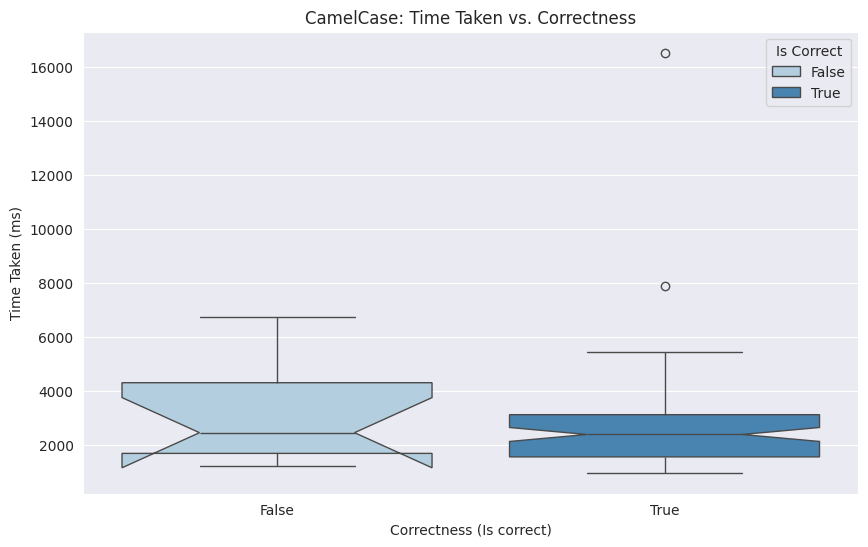

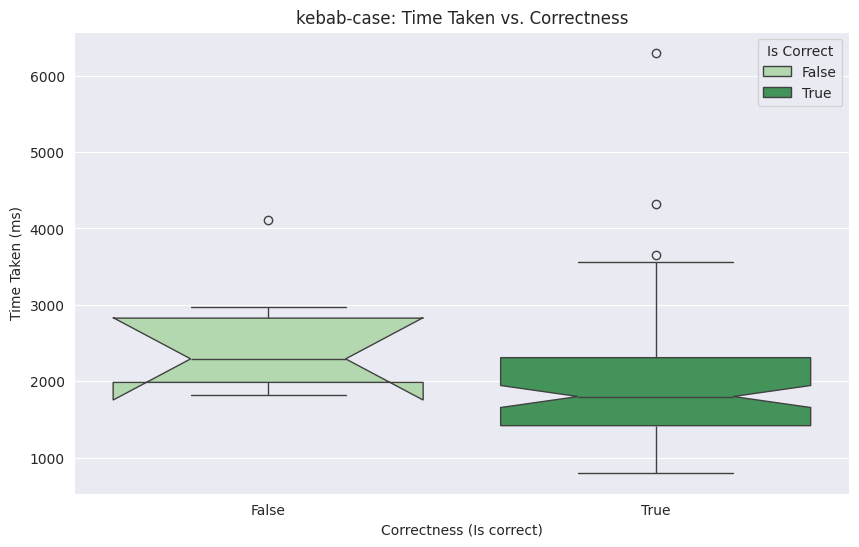

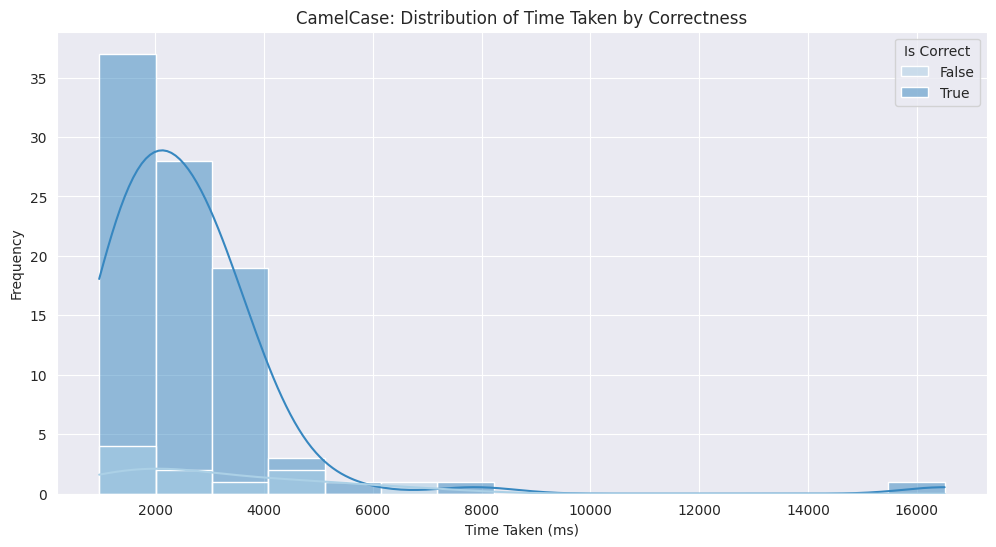

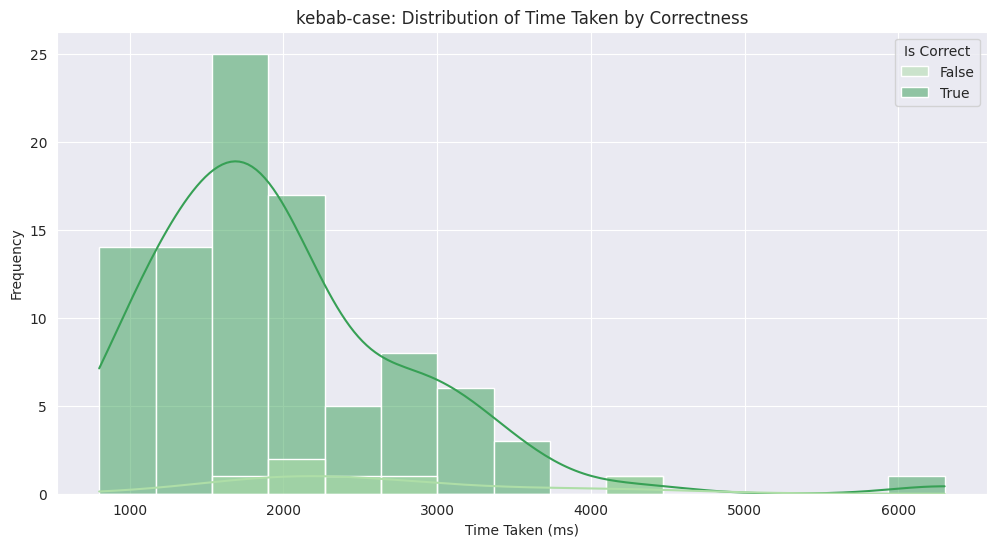

In [83]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=camelCase_data, x='Is Correct', y='Time Taken (ms)', hue='Is Correct', palette='Blues', notch=True)
plt.title('CamelCase: Time Taken vs. Correctness')
plt.xlabel('Correctness (Is correct)')
plt.ylabel('Time Taken (ms)')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=kebabcase_data, x='Is Correct', y='Time Taken (ms)', hue='Is Correct', palette='Greens', notch=True)
plt.title('kebab-case: Time Taken vs. Correctness')
plt.xlabel('Correctness (Is correct)')
plt.ylabel('Time Taken (ms)')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data=camelCase_data, x='Time Taken (ms)', hue='Is Correct', kde=True, palette='Blues', bins=15)
plt.title('CamelCase: Distribution of Time Taken by Correctness')
plt.xlabel('Time Taken (ms)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data=kebabcase_data, x='Time Taken (ms)', hue='Is Correct', kde=True, palette='Greens', bins=15)
plt.title('kebab-case: Distribution of Time Taken by Correctness')
plt.xlabel('Time Taken (ms)')
plt.ylabel('Frequency')
plt.show()



